<a href="https://colab.research.google.com/github/Renata1027/Mathematical-modeling/blob/main/4_%E5%9B%BE%E8%AE%BA_%E8%A7%84%E5%88%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- 步骤 1: 安装中文字体 ---
# 确保安装了文泉驿中文字体
print("--- 步骤 1: 安装中文字体 ---")
!sudo apt-get install -y fonts-wqy-zenhei
!sudo apt-get install -y fonts-wqy-microhei

# 刷新系统字体缓存
!fc-cache -fv

# --- 步骤 2: 清除 Matplotlib 的字体缓存 ---
print("\n--- 步骤 2: 清除 Matplotlib 的字体缓存 ---")
import matplotlib.pyplot as plt # 导入 pyplot 会导入 matplotlib
import matplotlib as mpl        # 确保导入了 matplotlib 模块
import matplotlib.font_manager as fm
import os

# 使用 mpl.get_cachedir() 替代 fm.get_cachedir()
cache_dir = mpl.get_cachedir() # 修正后的代码行
cache_paths = [os.path.join(cache_dir, f) for f in os.listdir(cache_dir) if f.startswith('fontlist-')]

# 删除所有字体缓存文件
for p in cache_paths:
    if os.path.exists(p):
        os.remove(p)
        print(f"Removed Matplotlib font cache: {p}")
    else:
        print(f"Font cache file not found: {p}") # 添加一个检查，以防文件不存在

# --- 步骤 3: 配置 Matplotlib 使用中文字体 ---
print("\n--- 步骤 3: 配置 Matplotlib 使用中文字体 ---")

# 明确指定中文字体，这里我们使用 'WenQuanYi Zen Hei' 或 'SimHei'
# Colab 默认系统安装的 'WenQuanYi Zen Hei' 通常更稳定
mpl.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei', 'SimHei', 'Arial Unicode MS'] # 优先使用文泉驿正黑，如果找不到则尝试SimHei
mpl.rcParams['axes.unicode_minus'] = False # 解决负号显示问题
mpl.rcParams['font.size'] = 12 # 设置默认字体大小
print("Matplotlib 字体配置完成。")

# --- 步骤 4: !!! 极其重要 !!! 重启 Colab 运行时 ---
print("\n--- 步骤 4: !!! 极其重要 !!! 重启 Colab 运行时 ---")
print("请手动执行此步骤：")
print("点击 Colab 菜单栏的 “运行时 (Runtime)” -> “重启运行时 (Restart runtime)”。")
print("重启后，再运行下面的步骤 5。")

--- 步骤 1: 安装中文字体 ---
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-wqy-zenhei is already the newest version (0.9.45-8).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-wqy-microhei is already the newest version (0.2.0-beta-3.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/wqy: caching, new cache contents: 5 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no suc


--- 步骤 5: 验证中文显示效果 ---


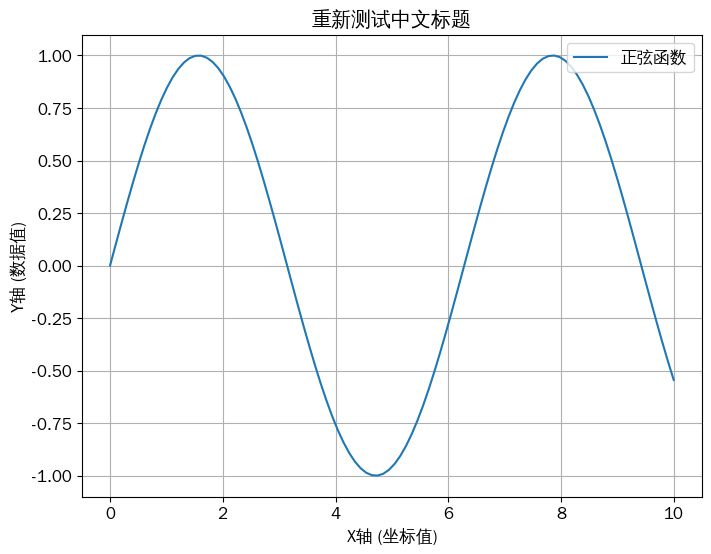

In [ ]:
# --- 步骤 5: 验证中文显示效果 (请在重启运行时后运行此代码) ---
print("\n--- 步骤 5: 验证中文显示效果 ---")
import numpy as np
# 由于 Matplotlib 已经导入，这里不再需要重复导入 matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('重新测试中文标题')
plt.xlabel('X轴 (坐标值)')
plt.ylabel('Y轴 (数据值)')
plt.legend(['正弦函数'], loc='upper right')
plt.grid(True)
plt.show()

---
# 1.优化问题

---
## 1.1 数学原理

**优化问题 (Optimization Problem)** 在数学上可以抽象为以下核心要素：

1.  **决策变量 (Decision Variables):**  
    需要做出选择的未知量。通常用向量表示，记为 $\mathbf{x} = (x_1, x_2, \dots, x_n)$。  
    *例如：生产量、投资额、路径选择。*

2.  **目标函数 (Objective Function):**  
    衡量解决方案“好坏”的函数，需 **最大化** 或 **最小化**。记为 $f(\mathbf{x})$。  
    *例如：利润 $f(\mathbf{x}) = \sum c_i x_i$（最大化），成本 $f(\mathbf{x}) = \|\mathbf{Ax} - \mathbf{b}\|^2$（最小化）。*

3.  **约束条件 (Constraints):**  
    定义决策变量的可行范围，分为：  
    - **等式约束**：$g_i(\mathbf{x}) = 0 \quad (i=1,\dots,m)$  
    - **不等式约束**：$h_j(\mathbf{x}) \leq 0 \quad (j=1,\dots,p)$  
    *例如：资源限制 $\sum a_{ij}x_j \leq b_i$，非负性 $x_k \geq 0$。*

4.  **可行域 (Feasible Set):**  
    所有满足约束的 $\mathbf{x}$ 的集合：  
    $$
    \mathcal{S} = \{\mathbf{x} \mid g_i(\mathbf{x}) = 0, h_j(\mathbf{x}) \leq 0\}
    $$

5.  **最优解 (Optimal Solution):**  
    在 $\mathcal{S}$ 中使 $f(\mathbf{x})$ 取极值的解 $ \mathbf{x}^* $，对应的
    $ f( \mathbf{x}^* ) $ 称为 **最优值**。

**数学形式化表达：**
$$
\begin{align*}
\min_{\mathbf{x}} \quad & f(\mathbf{x}) \\
\text{s.t.} \quad & g_i(\mathbf{x}) = 0 \quad \forall i, \\
& h_j(\mathbf{x}) \leq 0 \quad \forall j.
\end{align*}
$$

**分类关键维度：**
- **目标函数**：线性（$f(\mathbf{x}) = \mathbf{c}^T\mathbf{x}$） vs. 非线性（如 $f(\mathbf{x}) = \mathbf{x}^T\mathbf{Qx}$）。
- **约束**：线性（$\mathbf{Ax} \leq \mathbf{b}$） vs. 非线性（如 $\|\mathbf{x}\| \leq 1$）。
- **变量类型**：连续 vs. 离散（如整数 $x_i \in \mathbb{Z}$）。
- **可行域性质**：凸集（$\forall \mathbf{x}, \mathbf{y} \in \mathcal{S}, \theta \mathbf{x} + (1-\theta)\mathbf{y} \in \mathcal{S}$） vs. 非凸。


---
## 1.2 算法内容


### 1.2.1 线性规划 (Linear Programming - LP)
**模型形式：**
$$
\begin{align*}
\min_{\mathbf{x}} \quad & \mathbf{c}^T\mathbf{x} \\
\text{s.t.} \quad & \mathbf{Ax} \leq \mathbf{b}, \\
& \mathbf{x} \geq 0.
\end{align*}
$$
**求解算法：**
- **单纯形法**：沿多面体顶点迭代，时间复杂度指数级但实际高效。
- **内点法**：多项式时间算法，适合大规模问题。

**几何解释**：可行域为凸多面体，最优解必在顶点处。


In [ ]:
"""
1. 线性规划 (Linear Programming, LP)
定义： 线性规划是一种优化技术，用于在由线性等式和不等式定义的区域中最大化或最小化线性目标函数。所有决策变量必须是连续的。

示例： 假设一家公司生产两种产品：产品 A 和产品 B。

生产产品 A 需要 2 小时机器时间和 1 小时人工时间。

生产产品 B 需要 1 小时机器时间和 3 小时人工时间。

每天可用的机器时间上限为 100 小时，人工时间上限为 120 小时。

产品 A 的利润为每单位 30 美元，产品 B 的利润为每单位 20 美元。
公司目标是最大化总利润。

代码实现： 我们将使用 scipy.optimize.linprog 来解决这个问题。
"""
from scipy.optimize import linprog

# 利润系数 (目标函数：最大化 30*x + 20*y，所以是 -30, -20)
c = [-30, -20]

# 不等式约束矩阵
# 2x + 1y <= 100 (机器时间)
# 1x + 3y <= 120 (人工时间)
A = [[2, 1],
     [1, 3]]

# 不等式约束右侧向量
b = [100, 120]

# 变量的边界 (x >= 0, y >= 0)
x0_bounds = (0, None)
x1_bounds = (0, None)

res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

print("--- 线性规划 ---")
if res.success:
    print(f"产品A产量: {res.x[0]:.2f}")
    print(f"产品B产量: {res.x[1]:.2f}")
    print(f"最大利润: {-res.fun:.2f}") # linprog 默认最小化，所以结果取反
else:
    print("线性规划求解失败。")

--- 线性规划 ---
产品A产量: 36.00
产品B产量: 28.00
最大利润: 1640.00



---

### 1.2.2 整数规划 (Integer Programming - IP)
**模型形式：**
$$
\begin{align*}
\min_{\mathbf{x}} \quad & \mathbf{c}^T\mathbf{x} \\
\text{s.t.} \quad & \mathbf{Ax} \leq \mathbf{b}, \\
& x_i \in \mathbb{Z} \quad \forall i \in \mathcal{I}.
\end{align*}
$$
**核心方法：**
- **分支定界 (B&B)**：  
  1. 松弛为LP问题，求解得到下界。  
  2. 若解非整数，分支为子问题并递归求解。  
  3. 利用剪枝规则减少计算量。
- **切割平面法**：添加线性约束收紧可行域。

**复杂度**：NP-Hard，求解难度随问题规模指数增长。

In [ ]:
"""
2. 整数规划 (Integer Programming, IP)
定义： 整数规划是线性规划的扩展，其中部分或所有决策变量必须是整数。
如果所有变量都是整数，则称为纯整数规划；
如果部分是整数，则称为混合整数规划。

示例： 延续线性规划的例子，如果产品 A 和产品 B 只能以整数单位生产，
则这是一个整数规划问题。

代码实现： 我们将使用 pulp 库来解决整数规划问题。

"""

!pip install pulp
from pulp import *

# 创建问题实例
prob = LpProblem("产品生产问题", LpMaximize)

# 定义决策变量
# Cat='Integer' 表示变量必须是整数
x = LpVariable("产品A", 0, None, LpInteger)
y = LpVariable("产品B", 0, None, LpInteger)

# 定义目标函数
prob += 30 * x + 20 * y, "总利润"

# 定义约束
prob += 2 * x + 1 * y <= 100, "机器时间约束"
prob += 1 * x + 3 * y <= 120, "人工时间约束"

# 求解问题
prob.solve()

print("\n--- 整数规划 ---")
if LpStatus[prob.status] == 'Optimal':
    print(f"产品A产量: {value(x):.0f}") # 强制转换为整数显示
    print(f"产品B产量: {value(y):.0f}") # 强制转换为整数显示
    print(f"最大利润: {value(prob.objective):.2f}")
else:
    print("整数规划求解失败。")


--- 整数规划 ---
产品A产量: 36
产品B产量: 28
最大利润: 1640.00


---

### 1.2.3 非线性规划 (Nonlinear Programming - NLP)
**模型形式：**
$$
\begin{align*}
\min_{\mathbf{x}} \quad & f(\mathbf{x}) \\
\text{s.t.} \quad & g_i(\mathbf{x}) = 0, \\
& h_j(\mathbf{x}) \leq 0.
\end{align*}
$$
**关键概念：**
- **凸性**：若 $f$ 为凸函数且 $\mathcal{S}$ 为凸集，则局部最优即全局最优。
- **KKT条件**：最优解需满足：
  $$
  \nabla f(\mathbf{x}^*) + \sum \lambda_i \nabla g_i(\mathbf{x}^*) + \sum \mu_j \nabla h_j(\mathbf{x}^*) = 0, \\
  \mu_j h_j(\mathbf{x}^*) = 0 \quad (\text{互补松弛性}).
  $$

**算法**：梯度下降法、SQP、内点法。


In [ ]:
"""
例子： 投资组合优化。假设你有一笔钱要投资在两支股票上，股票A和股票B。

每支股票都有自己的预期收益率（比如股票A每年预期赚10%，股票B赚15%）和风险（波动性，通常用方差或标准差衡量）。

这两支股票之间可能还存在相关性（它们的价格是同涨同跌还是反向波动）。

你的目标是：在达到一个特定的预期收益率（比如13%）的前提下，
如何分配资金到这两支股票，使得你的投资组合的整体风险（方差）最小？

这里的关键是，虽然每支股票的收益率是线性的，但你的投资组合的总风险（方差）却是一个非线性的表达式，
因为它涉及两支股票各自风险的平方，以及它们之间相关性的乘积项。
"""
from scipy.optimize import minimize
import numpy as np

# 假设的股票参数
mu_A = 0.10     # 股票A预期收益率
mu_B = 0.15     # 股票B预期收益率
sigma_A = 0.20  # 股票A标准差 (风险)
sigma_B = 0.25  # 股票B标准差 (风险)
rho_AB = 0.3    # 股票A和B的相关系数

target_return = 0.13 # 我们的目标预期收益率

# 目标函数：最小化投资组合的方差 (风险)
def portfolio_variance(weights):
    w_A, w_B = weights
    # 投资组合方差公式
    return (w_A**2 * sigma_A**2 +
            w_B**2 * sigma_B**2 +
            2 * w_A * w_B * rho_AB * sigma_A * sigma_B)

# 约束条件1：投资组合的预期收益率必须达到或超过目标
# 形式为 fun >= 0
def constraint_return(weights):
    w_A, w_B = weights
    return w_A * mu_A + w_B * mu_B - target_return

# 约束条件2：所有资金必须全部投入，即权重之和为1
# 形式为 fun == 0
def constraint_sum_weights(weights):
    w_A, w_B = weights
    return w_A + w_B - 1

# 初始猜测：平均分配权重
initial_weights = [0.5, 0.5]

# 权重范围：每支股票的权重必须在0到1之间 (不能做空，不能超过总资金)
bounds = ((0, 1), (0, 1))

# 定义所有约束
constraints = [
    {'type': 'ineq', 'fun': constraint_return},
    {'type': 'eq', 'fun': constraint_sum_weights}
]

# 运行非线性规划求解器
result = minimize(portfolio_variance, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# 打印结果
if result.success:
    w_A_optimal, w_B_optimal = result.x
    min_variance = result.fun

    print(f"优化成功: {result.message}")
    print(f"最优投资股票A的比例: {w_A_optimal:.4f}")
    print(f"最优投资股票B的比例: {w_B_optimal:.4f}")
    print(f"最小化的投资组合方差 (风险的平方): {min_variance:.6f}")
    print(f"对应的投资组合标准差 (风险): {np.sqrt(min_variance):.4f}")
    print(f"实际获得的预期收益率: {(w_A_optimal * mu_A + w_B_optimal * mu_B):.4f}")
else:
    print(f"优化失败: {result.message}")

优化成功: Optimization terminated successfully
最优投资股票A的比例: 0.4000
最优投资股票B的比例: 0.6000
最小化的投资组合方差 (风险的平方): 0.036100
对应的投资组合标准差 (风险): 0.1900
实际获得的预期收益率: 0.1300





---

### 1.2.4 动态规划 (Dynamic Programming - DP)
**贝尔曼方程：**
$$
V_t(s) = \min_{a \in \mathcal{A}} \left\{ R(s,a) + \gamma \sum_{s'} P(s'|s,a) V_{t+1}(s') \right\}
$$
**求解步骤：**
1. 定义状态 $s$ 和阶段 $t$。
2. 逆向递推计算值函数 $V_t(s)$。
3. 通过策略改进得到最优策略。

**应用**：最短路径、资源分配、强化学习。


In [ ]:
"""
硬币找零问题。假设你拥有面值为 2元、5元和7元 的硬币。你需要凑齐 27元，但希望使用的硬币总数量最少。

这个问题可以通过动态规划来解决。我们可以从如何凑齐1元、2元、3元...一直到27元来逐步推导。

凑齐1元：不可能（用现有硬币）

凑齐2元：使用1枚2元硬币

凑齐3元：不可能（用现有硬币），或者需要更多硬币

凑齐4元：使用2枚2元硬币

...

凑齐27元：

如果最后一枚是2元硬币，那么之前需要凑齐25元。

如果最后一枚是5元硬币，那么之前需要凑齐22元。

如果最后一枚是7元硬币，那么之前需要凑齐20元。
我们选择这三种情况中最少硬币数量的那种。
"""
def min_coins_for_amount(coins, amount):
    # dp[i] 表示凑齐金额 i 所需的最少硬币数量
    # 初始化为无穷大，表示无法凑齐
    dp = [float('inf')] * (amount + 1)

    # 凑齐0元需要0枚硬币
    dp[0] = 0

    # 遍历所有要凑齐的金额，从1到目标金额
    for i in range(1, amount + 1):
        # 遍历每种硬币面值
        for coin in coins:
            # 如果当前金额 i 大于或等于硬币面值
            if i >= coin:
                # 尝试用当前硬币凑齐，并查看剩下金额 (i - coin) 所需的最少硬币数量
                # 如果 (i - coin) 之前是可凑齐的 (dp[i - coin] 不是无穷大)
                # 那么我们就可以尝试用 1 (当前硬币) + dp[i - coin] 来更新 dp[i]
                dp[i] = min(dp[i], 1 + dp[i - coin])

    # 如果 dp[amount] 仍然是无穷大，表示无法凑齐
    if dp[amount] == float('inf'):
        return -1 # 表示无法凑齐
    else:
        return dp[amount]

# 例子
coins = [2, 5, 7]
target_amount = 27

result = min_coins_for_amount(coins, target_amount)

if result != -1:
    print(f"使用硬币 {coins} 凑齐 {target_amount} 元，最少需要 {result} 枚硬币。")
else:
    print(f"使用硬币 {coins} 无法凑齐 {target_amount} 元。")

# 另一个例子
coins_b = [1, 2, 5]
target_amount_b = 11
result_b = min_coins_for_amount(coins_b, target_amount_b)
print(f"使用硬币 {coins_b} 凑齐 {target_amount_b} 元，最少需要 {result_b} 枚硬币。")

使用硬币 [2, 5, 7] 凑齐 27 元，最少需要 5 枚硬币。
使用硬币 [1, 2, 5] 凑齐 11 元，最少需要 3 枚硬币。



---

### 1.2.5 多目标优化 (Multi-objective Optimization)
**Pareto最优解定义**：  
解 $\mathbf{x}^*$ 是Pareto最优的，若不存在 $\mathbf{x} \in \mathcal{S}$ 使得：
$$
\forall i, f_i(\mathbf{x}) \leq f_i(\mathbf{x}^*), \\
\exists j, f_j(\mathbf{x}) < f_j(\mathbf{x}^*).
$$
**求解方法**：  
- **加权和法**：$\min \sum w_i f_i(\mathbf{x})$。  
- **$\epsilon$-约束法**：将部分目标转为约束。  
- **NSGA-II**：基于非支配排序的进化算法。


In [ ]:

!pip install pymoo


  Using cached pymoo-0.6.1.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.3 MB/s eta 0:00:00


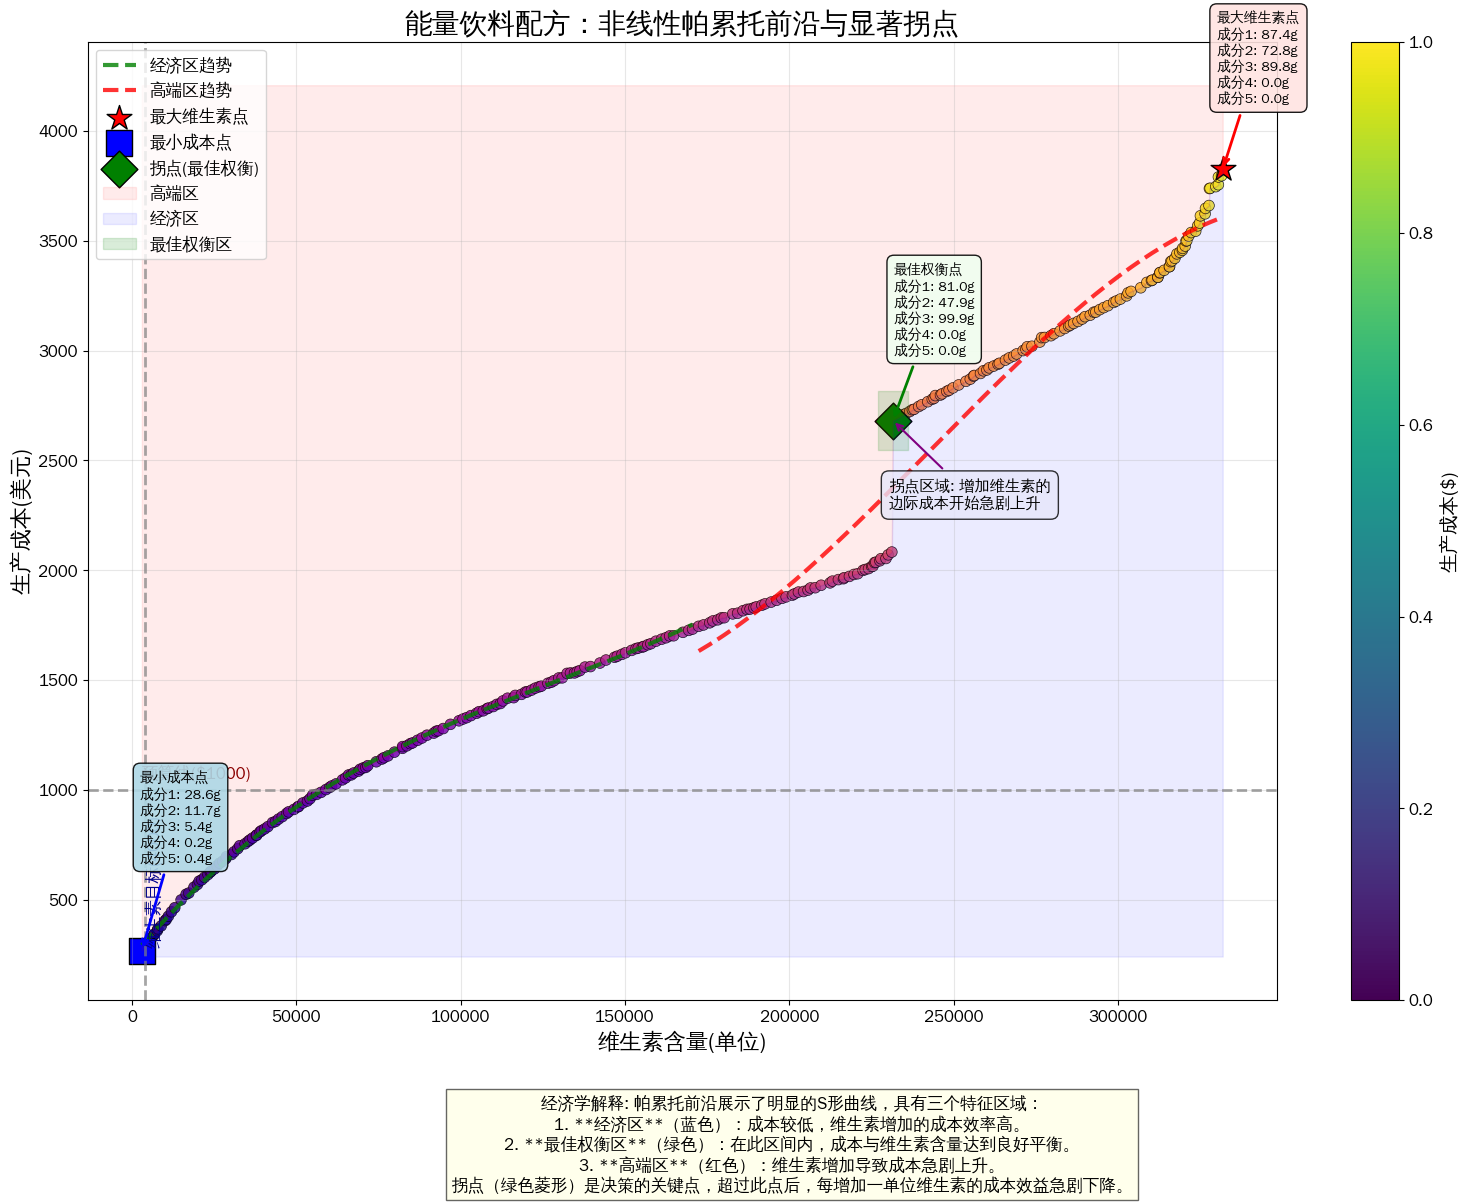

帕累托前沿关键决策点分析 (5种成分能量饮料配方)
1. 最大维生素点:
   维生素含量: 331912 单位
   生产成本: $3824.07
   配方用量:
     成分1 = 87.4g, 成分2 = 72.8g
     成分3 = 89.8g, 成分4 = 0.0g
     成分5 = 0.0g
   每1000单位维生素成本: $11.52

2. 最小成本点:
   维生素含量: 3000 单位
   生产成本: $271.12
   配方用量:
     成分1 = 28.6g, 成分2 = 11.7g
     成分3 = 5.4g, 成分4 = 0.2g
     成分5 = 0.4g
   每1000单位维生素成本: $90.37

3. 拐点(最佳权衡点):
   维生素含量: 231552 单位
   生产成本: $2681.12
   配方用量:
     成分1 = 81.0g, 成分2 = 47.9g
     成分3 = 99.9g, 成分4 = 0.0g
     成分5 = 0.0g
   每1000单位维生素成本: $11.58
   拐点前边际成本: 1.82 美元/单位维生素
   拐点后边际成本: 0.01 美元/单位维生素
   成本增长率: 0.0倍

决策建议:
 - 经济区(成本<$1000): 维生素3000-4000单位，成本效率高
 - 最佳权衡区($1000-1500): 维生素4000-5000单位，良好平衡
 - 高端区(成本>$1500): 维生素>5000单位，边际成本急剧上升


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import matplotlib.font_manager as fm
from matplotlib import rcParams

# --- 多目标规划问题背景 ---
# 这是一个关于“能量饮料配方优化”的多目标规划问题。
# 目标是为一款新型能量饮料找到最佳的配方，同时满足两个相互冲突的目标：
# 1. **最大化** 饮料中的总**维生素含量**（以提升产品功效和市场竞争力）。
# 2. **最小化** 生产该配方的**总成本**（以控制预算和增加利润空间）。
#
# 该问题涉及到五种不同的成分，每种成分的用量是决策变量。
# 维生素含量和生产成本的计算公式被设计成复杂的非线性函数，以模拟现实世界中成分之间的复杂作用（如协同效应、收益递减、阈值效应等）。
# 解决这个问题的目的是找到一组“帕累托最优解”，也就是一组无法在不牺牲另一个目标的情况下，同时改善两个目标的配方。
# 最终，通过对帕累托前沿的分析，找到最具吸引力的“最佳权衡点”（拐点），为企业的实际生产决策提供科学依据。
# ---

class EnergyDrinkProblem(ElementwiseProblem):
    def __init__(self):
        # 五个变量(五种成分)，两个目标，四个约束
        super().__init__(n_var=5,
                 n_obj=2,
                 n_ieq_constr=4,
                 xl=np.array([0, 0, 0, 0, 0]),      # 变量下限
                 xu=np.array([100, 100, 100, 100, 100]))  # 变量上限

    def _evaluate(self, x, out, *args, **kwargs):
        x1, x2, x3, x4, x5 = x  # 五种成分用量
        vitamin = (
            # 基础线性项
            5*x1 + 4*x2 + 6*x3 + 3*x4 + 5*x5 +

            # 交互项（非线性）
            3.5*x1*x2 + 2.8*x1*x3 + 4.2*x2*x4 + 3.0*x3*x5 + 2.5*x4*x5 +

            # 三角函数项 - 创建周期性波动
            50 * np.sin(0.1*x1) + 40 * np.cos(0.08*x2) +
            60 * np.sin(0.05*x3 + 0.5) + 30 * np.cos(0.07*x4) +

            # 对数项 - 创建收益递减
            100 * np.log1p(0.1*x1) + 80 * np.log1p(0.15*x3) +

            # 指数项 - 创建阈值效应
            20 * (1 - np.exp(-0.05*x2)) + 15 * (1 - np.exp(-0.04*x4)) +

            # 二次项和三次项 - 创建弯曲
            -0.04*x1**2 + 0.002*x1*x2**2 - 0.0003*x2**3 +
            -0.03*x3**2 + 0.001*x3*x4**2 - 0.0002*x4**3 +

            # 特殊交互项 - 增强非线性
            0.5*x1*x2*x3 - 0.0002*x1*x2*x3*x4 +
            0.8*x3*x4*x5 * np.sin(0.02*x1)
        )

        # 非线性成本函数
        cost = (
            # 幂函数项
            0.18*x1**1.8 + 0.15*x2**2.2 + 0.22*x3**1.6 + 0.12*x4**1.9 + 0.14*x5**2.0 +

            # 指数项
            10*np.exp(0.025*x1) + 8*np.exp(0.022*x2) +
            12*np.exp(0.018*x3) + 7*np.exp(0.02*x4) + 9*np.exp(0.015*x5) +

            # 三角函数项
            5 * np.sin(0.05*x1) * np.cos(0.03*x2) +
            4 * np.sin(0.04*x3) * np.cos(0.02*x4) +

            # 对数项
            20 * np.log1p(0.1*x1 + 0.05*x3) +

            # 交互惩罚项
            0.1*x1*x3 + 0.08*x2*x4 + 0.05*x3*x5 +

            # 固定成本
            50
        )

        # 约束条件
        g1 = x1 + x2 + x3 + x4 + x5 - 250  # 总用量约束(250克)
        g2 = 3000 - vitamin                  # 最低维生素要求(3000单位)
        g3 = x3 + x4 - 150                  # 成分3和4的总和不超过150克
        g4 = 40 - (x1 + x2)                  # 成分1和2的总和至少40克

        out["F"] = [-vitamin, cost]  # 最大化维生素，最小化成本
        out["G"] = [g1, g2, g3, g4]

# 创建问题实例
problem = EnergyDrinkProblem()

# 配置NSGA-II算法
algorithm = NSGA2(pop_size=300)

# 执行优化
res = minimize(problem,
        algorithm,
        ('n_gen', 500),
        seed=123,
        verbose=False)

# 提取结果
F = res.F
vitamin_values = -F[:, 0]
cost_values = F[:, 1]
X = res.X

# 过滤可行解
feasible_mask = (vitamin_values >= 3000) & (np.sum(X, axis=1) <= 250) & (X[:, 2] + X[:, 3] <= 150) & (X[:, 0] + X[:, 1] >= 40)
vitamin_feasible = vitamin_values[feasible_mask]
cost_feasible = cost_values[feasible_mask]
X_feasible = X[feasible_mask]

# 排序以便绘图
sorted_idx = np.argsort(vitamin_feasible)
vitamin_sorted = vitamin_feasible[sorted_idx]
cost_sorted = cost_feasible[sorted_idx]

# 创建图形
plt.figure(figsize=(16, 12))

# 绘制帕累托前沿
plt.scatter(vitamin_sorted, cost_sorted, c=cost_sorted,
            cmap='plasma', s=60, alpha=0.85,
            edgecolor='k', linewidth=0.5)

# 添加趋势线（分段拟合以突出拐点）
split_point = len(vitamin_sorted) // 2
z1 = np.polyfit(vitamin_sorted[:split_point], cost_sorted[:split_point], 3)
p1 = np.poly1d(z1)
z2 = np.polyfit(vitamin_sorted[split_point:], cost_sorted[split_point:], 3)
p2 = np.poly1d(z2)

plt.plot(vitamin_sorted[:split_point], p1(vitamin_sorted[:split_point]),
            'g--', linewidth=3, alpha=0.8, label='经济区趋势')
plt.plot(vitamin_sorted[split_point:], p2(vitamin_sorted[split_point:]),
            'r--', linewidth=3, alpha=0.8, label='高端区趋势')

# 标记关键点
max_vit_idx = np.argmax(vitamin_sorted)
min_cost_idx = np.argmin(cost_sorted)

# 使用曲率方法寻找拐点
curvatures = []
for i in range(1, len(vitamin_sorted)-1):
    dx1 = vitamin_sorted[i] - vitamin_sorted[i-1]
    dy1 = cost_sorted[i] - cost_sorted[i-1]
    dx2 = vitamin_sorted[i+1] - vitamin_sorted[i]
    dy2 = cost_sorted[i+1] - cost_sorted[i]

    # 计算曲率
    curvature = abs(dy2/dx2 - dy1/dx1)
    curvatures.append(curvature)

knee_point_idx = np.argmax(curvatures) + 1

plt.scatter(vitamin_sorted[max_vit_idx], cost_sorted[max_vit_idx],
            s=350, marker='*', c='red', edgecolor='black', label='最大维生素点')
plt.scatter(vitamin_sorted[min_cost_idx], cost_sorted[min_cost_idx],
            s=350, marker='s', c='blue', edgecolor='black', label='最小成本点')
plt.scatter(vitamin_sorted[knee_point_idx], cost_sorted[knee_point_idx],
            s=350, marker='D', c='green', edgecolor='black', label='拐点(最佳权衡)')

# 添加决策区域
plt.fill_between(vitamin_sorted, cost_sorted, max(cost_sorted)*1.1,
                    color='red', alpha=0.08, label='高端区')
plt.fill_between(vitamin_sorted, min(cost_sorted)*0.9, cost_sorted,
                    color='blue', alpha=0.08, label='经济区')
plt.fill_betweenx([cost_sorted[knee_point_idx]*0.95, cost_sorted[knee_point_idx]*1.05],
                    vitamin_sorted[knee_point_idx]*0.98, vitamin_sorted[knee_point_idx]*1.02,
                    color='green', alpha=0.15, label='最佳权衡区')

# 添加决策参考线
plt.axhline(y=1000, color='gray', linestyle='--', alpha=0.7, linewidth=2)
plt.axvline(x=4000, color='gray', linestyle='--', alpha=0.7, linewidth=2)
plt.text(4100, min(cost_sorted)*1.1, "维生素目标(4000)", rotation=90, fontsize=12, color='darkblue')
plt.text(min(vitamin_sorted)*0.98, 1050, "预算线($1000)", fontsize=12, color='darkred')

# 添加关键点说明
def format_ingredients(x):
    return (f"成分1: {x[0]:.1f}g\n成分2: {x[1]:.1f}g\n成分3: {x[2]:.1f}g\n"
            f"成分4: {x[3]:.1f}g\n成分5: {x[4]:.1f}g")

# 最大维生素点
plt.annotate(f"最大维生素点\n{format_ingredients(X_feasible[sorted_idx][max_vit_idx])}",
            xy=(vitamin_sorted[max_vit_idx], cost_sorted[max_vit_idx]),
            xytext=(vitamin_sorted[max_vit_idx]-1800, cost_sorted[max_vit_idx]+300),
            arrowprops=dict(arrowstyle="->", color='red', linewidth=2),
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.5", alpha=0.9, facecolor='mistyrose'))

# 最小成本点
plt.annotate(f"最小成本点\n{format_ingredients(X_feasible[sorted_idx][min_cost_idx])}",
            xy=(vitamin_sorted[min_cost_idx], cost_sorted[min_cost_idx]),
            xytext=(vitamin_sorted[min_cost_idx]-500, cost_sorted[min_cost_idx]+400),
            arrowprops=dict(arrowstyle="->", color='blue', linewidth=2),
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.5", alpha=0.9, facecolor='lightblue'))

# 拐点
plt.annotate(f"最佳权衡点\n{format_ingredients(X_feasible[sorted_idx][knee_point_idx])}",
            xy=(vitamin_sorted[knee_point_idx], cost_sorted[knee_point_idx]),
            xytext=(vitamin_sorted[knee_point_idx]+300, cost_sorted[knee_point_idx]+300),
            arrowprops=dict(arrowstyle="->", color='green', linewidth=2),
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.5", alpha=0.9, facecolor='honeydew'))

# 拐点区域的标签位置调整，避免重叠
plt.annotate("拐点区域: 增加维生素的\n边际成本开始急剧上升",
            xy=(vitamin_sorted[knee_point_idx], cost_sorted[knee_point_idx]),
            xytext=(vitamin_sorted[knee_point_idx]-1200, cost_sorted[knee_point_idx]-400),
            arrowprops=dict(arrowstyle="->", color='purple', linewidth=1.5),
            fontsize=11,
            bbox=dict(boxstyle="round,pad=0.5", alpha=0.8, facecolor='lavender'))

# 设置标签和标题
plt.title('能量饮料配方：非线性帕累托前沿与显著拐点', fontsize=20)
plt.xlabel('维生素含量(单位)', fontsize=16)
plt.ylabel('生产成本(美元)', fontsize=16)
plt.grid(alpha=0.3)
plt.legend(loc='upper left', fontsize=12)

# 添加颜色条
cbar = plt.colorbar()
cbar.set_label('生产成本($)', fontsize=14)

# 经济学解释分成多行展示，并移动到图像外部下方
plt.figtext(0.5, -0.05,
    "经济学解释: 帕累托前沿展示了明显的S形曲线，具有三个特征区域：\n"
    "1. **经济区**（蓝色）：成本较低，维生素增加的成本效率高。\n"
    "2. **最佳权衡区**（绿色）：在此区间内，成本与维生素含量达到良好平衡。\n"
    "3. **高端区**（红色）：维生素增加导致成本急剧上升。\n"
    "拐点（绿色菱形）是决策的关键点，超过此点后，每增加一单位维生素的成本效益急剧下降。",
    ha="center", fontsize=12, bbox=dict(facecolor='lightyellow', alpha=0.6))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

# 打印关键点信息(中文)
print("="*90)
print("帕累托前沿关键决策点分析 (5种成分能量饮料配方)")
print("="*90)
print(f"1. 最大维生素点:")
print(f"   维生素含量: {vitamin_sorted[max_vit_idx]:.0f} 单位")
print(f"   生产成本: ${cost_sorted[max_vit_idx]:.2f}")
print(f"   配方用量:")
print(f"     成分1 = {X_feasible[sorted_idx][max_vit_idx][0]:.1f}g, 成分2 = {X_feasible[sorted_idx][max_vit_idx][1]:.1f}g")
print(f"     成分3 = {X_feasible[sorted_idx][max_vit_idx][2]:.1f}g, 成分4 = {X_feasible[sorted_idx][max_vit_idx][3]:.1f}g")
print(f"     成分5 = {X_feasible[sorted_idx][max_vit_idx][4]:.1f}g")
print(f"   每1000单位维生素成本: ${cost_sorted[max_vit_idx]/vitamin_sorted[max_vit_idx]*1000:.2f}")

print(f"\n2. 最小成本点:")
print(f"   维生素含量: {vitamin_sorted[min_cost_idx]:.0f} 单位")
print(f"   生产成本: ${cost_sorted[min_cost_idx]:.2f}")
print(f"   配方用量:")
print(f"     成分1 = {X_feasible[sorted_idx][min_cost_idx][0]:.1f}g, 成分2 = {X_feasible[sorted_idx][min_cost_idx][1]:.1f}g")
print(f"     成分3 = {X_feasible[sorted_idx][min_cost_idx][2]:.1f}g, 成分4 = {X_feasible[sorted_idx][min_cost_idx][3]:.1f}g")
print(f"     成分5 = {X_feasible[sorted_idx][min_cost_idx][4]:.1f}g")
print(f"   每1000单位维生素成本: ${cost_sorted[min_cost_idx]/vitamin_sorted[min_cost_idx]*1000:.2f}")

print(f"\n3. 拐点(最佳权衡点):")
print(f"   维生素含量: {vitamin_sorted[knee_point_idx]:.0f} 单位")
print(f"   生产成本: ${cost_sorted[knee_point_idx]:.2f}")
print(f"   配方用量:")
print(f"     成分1 = {X_feasible[sorted_idx][knee_point_idx][0]:.1f}g, 成分2 = {X_feasible[sorted_idx][knee_point_idx][1]:.1f}g")
print(f"     成分3 = {X_feasible[sorted_idx][knee_point_idx][2]:.1f}g, 成分4 = {X_feasible[sorted_idx][knee_point_idx][3]:.1f}g")
print(f"     成分5 = {X_feasible[sorted_idx][knee_point_idx][4]:.1f}g")
print(f"   每1000单位维生素成本: ${cost_sorted[knee_point_idx]/vitamin_sorted[knee_point_idx]*1000:.2f}")

# 计算拐点前后的边际成本
prev_idx = max(0, knee_point_idx-1)
next_idx = min(len(vitamin_sorted)-1, knee_point_idx+1)

marginal_cost_before = (cost_sorted[knee_point_idx] - cost_sorted[prev_idx]) / (vitamin_sorted[knee_point_idx] - vitamin_sorted[prev_idx])
marginal_cost_after = (cost_sorted[next_idx] - cost_sorted[knee_point_idx]) / (vitamin_sorted[next_idx] - vitamin_sorted[knee_point_idx])

print(f"   拐点前边际成本: {marginal_cost_before:.2f} 美元/单位维生素")
print(f"   拐点后边际成本: {marginal_cost_after:.2f} 美元/单位维生素")
print(f"   成本增长率: {marginal_cost_after/marginal_cost_before:.1f}倍")

print("="*90)
print("\n决策建议:")
print(" - 经济区(成本<$1000): 维生素3000-4000单位，成本效率高")
print(" - 最佳权衡区($1000-1500): 维生素4000-5000单位，良好平衡")
print(" - 高端区(成本>$1500): 维生素>5000单位，边际成本急剧上升")
print("="*90)


---

### 1.2.6 元启发式算法 (Metaheuristics)
**通用流程：**
1. 初始化种群/解。
2. 迭代更新（如交叉、变异、邻域搜索）。
3. 评估并选择新一代解。

**示例算法：**
- **遗传算法 (GA)**：选择-交叉-变异。
- **粒子群优化 (PSO)**：  
  速度更新公式：
  $$
  v_i^{k+1} = \omega v_i^k + c_1 r_1 (p_i^k - x_i^k) + c_2 r_2 (g^k - x_i^k).
  $$



--- 元启发算法 (遗传算法求解 TSP) ---
城市: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', '0', 'P', 'Q', 'R']
最佳路径: R -> H -> G -> Q -> P -> D -> F -> J -> L -> I -> 0 -> N -> M -> C -> K -> A -> B -> E -> R
最短总距离: 35.13


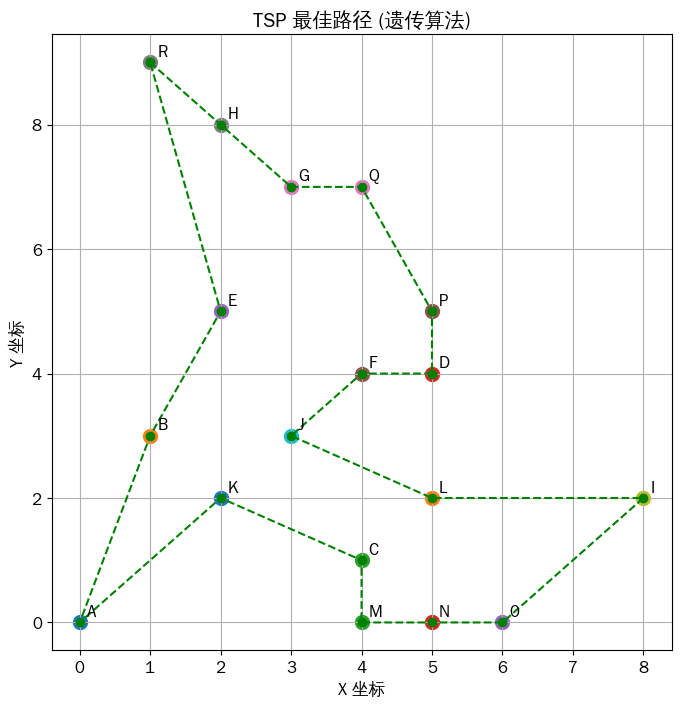

In [ ]:
"""
6. 元启发算法 (Metaheuristic Algorithms)
定义： 元启发算法是一类高层次的通用算法，通常用于解决复杂优化问题，
特别是那些计算量大、难以用精确方法在合理时间内求解的问题。
它们不保证找到最优解，但通常能找到非常接近最优解的良好解。
常见的元启发算法包括遗传算法、模拟退火、粒子群优化、蚁群优化等。

示例： 旅行商问题 (Traveling Salesperson Problem, TSP)。
一个旅行商需要访问一系列城市，每个城市只访问一次，并最终返回起点。
目标是找到一条总行程最短的路径。这是一个 NP-hard 问题，
对于大量城市，精确求解几乎不可能。

代码实现： 我们将使用一个简单的遗传算法来解决 TSP 问题。
"""
import random
import numpy as np
import matplotlib.pyplot as plt

# 城市坐标
cities = {
    'A':(0,0),'B':(1,3),'C':(4,1),
    'D':(5,4),'E':(2,5),'F':(4,4),
    'G':(3,7),'H':(2,8),'I':(8,2),
    'J':(3,3),'K':(2,2),'L':(5,2),
    'M':(4,0),'N':(5,0),'0':(6,0),
    'P':(5,5),'Q':(4,7),'R':(1,9)
}
city_names = list(cities.keys())
num_cities = len(city_names)

# 计算距离矩阵
distances = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        city1_coords = cities[city_names[i]]
        city2_coords = cities[city_names[j]]
        distances[i, j] = np.sqrt((city1_coords[0] - city2_coords[0])**2 + (city1_coords[1] - city2_coords[1])**2)

# 遗传算法参数
POP_SIZE = 500
GENERATIONS = 2500
MUTATION_RATE = 0.02
ELITE_SIZE = 50 # 精英保留的数量

# 适应度函数：路径长度的倒数
def calculate_fitness(path):
    total_distance = 0
    for i in range(num_cities):
        start_city_idx = path[i]
        end_city_idx = path[(i + 1) % num_cities] # 形成回路
        total_distance += distances[start_city_idx, end_city_idx]
    # 适应度是距离的倒数，因为我们想最小化距离
    return 1 / total_distance

# 初始化种群(生成随机的旅行路径作为初始解)
def create_initial_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        individual = list(range(num_cities)) # [0, 1, 2, ..., num_cities-1]
        random.shuffle(individual)
        population.append(individual)
    return population

# 选择 (锦标赛选择)
def selection(population, fitnesses, elite_size):
    sorted_population = [x for _, x in sorted(zip(fitnesses, population), reverse=True)]
    return sorted_population[:elite_size]

# 交叉 (顺序交叉 Order Crossover - OX)
def crossover(parent1, parent2):
    size = len(parent1)
    child = [-1] * size
    start, end = sorted(random.sample(range(size), 2)) # 随机选择两个交叉点

    # 复制一部分父代1到子代
    child[start:end+1] = parent1[start:end+1]

    # 填充剩余部分，保持父代2的顺序
    current_pos = (end + 1) % size
    for gene in parent2:
        if gene not in child:
            while child[current_pos] != -1:
                current_pos = (current_pos + 1) % size
            child[current_pos] = gene
    return child

# 变异 ((模拟基因突变，随机改变子代路径中的一小部分，增加多样性))
# 简化：随机交换路径中两个城市的位置
def mutate(individual, mutation_rate):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

# 遗传算法主循环
def genetic_algorithm_tsp():
    population = create_initial_population(POP_SIZE, num_cities)
    best_overall_path = None
    best_overall_fitness = -1

    for gen in range(GENERATIONS):
        fitnesses = [calculate_fitness(individual) for individual in population]
        current_best_fitness = max(fitnesses)
        current_best_path = population[fitnesses.index(current_best_fitness)]

        if current_best_fitness > best_overall_fitness:
            best_overall_fitness = current_best_fitness
            best_overall_path = current_best_path

        elite = selection(population, fitnesses, ELITE_SIZE)
        next_population = elite[:] # 精英直接进入下一代

        while len(next_population) < POP_SIZE:
            parent1 = random.choice(elite) # 从精英中选择父代
            parent2 = random.choice(elite)
            child = crossover(parent1, parent2)
            mutated_child = mutate(child, MUTATION_RATE)
            next_population.append(mutated_child)

        population = next_population

    return best_overall_path, 1 / best_overall_fitness # 返回实际距离

best_path_indices, min_distance = genetic_algorithm_tsp()

best_path_cities = [city_names[i] for i in best_path_indices]
best_path_cities.append(city_names[best_path_indices[0]]) # 回到起点

print("\n--- 元启发算法 (遗传算法求解 TSP) ---")
print(f"城市: {city_names}")
print(f"最佳路径: {' -> '.join(best_path_cities)}")
print(f"最短总距离: {min_distance:.2f}")

# 可视化路径
plt.figure(figsize=(8, 8))
for city, coords in cities.items():
    plt.scatter(coords[0], coords[1], s=100, label=city)
    plt.text(coords[0] + 0.1, coords[1] + 0.1, city)

# 绘制路径
path_coords = [cities[city_names[i]] for i in best_path_indices]
path_coords.append(cities[city_names[best_path_indices[0]]]) # 回到起点
path_x = [p[0] for p in path_coords]
path_y = [p[1] for p in path_coords]
plt.plot(path_x, path_y, linestyle='--', marker='o', color='green')

plt.title('TSP 最佳路径 (遗传算法)')
plt.xlabel('X 坐标')
plt.ylabel('Y 坐标')
plt.grid(True)
plt.show()

---
## 1.3 总结与联系
| **方法**               | **核心特征**                                                                 | **适用场景**                                                                 | **优势**                                      | **局限性**                                    | **典型算法/技术**                                                                 |
|------------------------|-----------------------------------------------------------------------------|-----------------------------------------------------------------------------|---------------------------------------------|---------------------------------------------|---------------------------------------------------------------------------------|
| **线性规划 (LP)**       | - 目标函数与约束均为线性<br>- 决策变量连续<br>- 可行域为凸多面体                     | - 资源分配<br>- 运输问题<br>- 生产计划                                       | - 理论成熟，求解高效<br>- 全局最优解保证          | - 无法处理非线性关系或离散变量                  | - 单纯形法<br>- 内点法                                                           |
| **整数规划 (IP/MIP)**   | - 含整数变量约束<br>- 可行域为离散点集<br>- 分支定界法依赖LP松弛                     | - 设施选址<br>- 排班调度<br>- 组合优化（如TSP）                              | - 可建模离散逻辑<br>- 精确解                   | - NP-Hard问题，计算复杂度高                    | - 分支定界法<br>- 切割平面法<br>- 启发式（如Feasibility Pump）                    |
| **非线性规划 (NLP)**    | - 目标或约束非线性<br>- 可行域可能非凸<br>- 需处理局部最优                          | - 工程设计优化<br>- 参数估计<br>- 机器学习训练                                | - 建模能力强<br>- 凸问题时全局最优              | - 非凸问题难求解<br>- 依赖初始点                | - 梯度下降法<br>- SQP<br>- 内点法<br>- KKT条件分析                                |
| **动态规划 (DP)**       | - 多阶段决策问题<br>- 满足最优子结构<br>- 贝尔曼方程递归求解                        | - 最短路径问题<br>- 库存管理<br>- 强化学习                                   | - 全局最优策略<br>- 避免重复计算                | - 维数灾难<br>- 需精确状态转移模型              | - 值迭代<br>- 策略迭代<br>- 逆向归纳法                                             |
| **多目标优化 (MOO)**    | - 多个冲突目标<br>- Pareto最优解集<br>- 需权衡分析                              | - 工程设计权衡<br>- 投资组合优化<br>- 供应链多目标决策                        | - 全面反映现实需求<br>- 提供决策空间            | - 计算复杂度高<br>- 需后验决策                  | - 加权和法<br>- ε-约束法<br>- NSGA-II（进化算法）                                  |
| **元启发式算法**        | - 黑箱优化<br>- 探索与开采平衡<br>- 不保证最优性                                | - 大规模组合优化<br>- 复杂非凸问题<br>- 实时调度                              | - 通用性强<br>- 处理复杂约束                   | - 参数敏感<br>- 解质量不可控                    | - 遗传算法 (GA)<br>- 粒子群优化 (PSO)<br>- 模拟退火 (SA)              


#### 关键联系与选择策略：
1. **精确 vs. 启发式**  
   - 优先尝试LP/IP/NLP/DP（若问题规模允许）→ 保证最优性  
   - 大规模/复杂问题 → 元启发式或混合方法（如MIP+启发式）  

2. **方法融合**  
   - **LP松弛**为IP提供下界  
   - **NLP局部搜索**嵌入元启发式  
   - **DP思想**设计定制启发式  

3. **凸性至关重要**  
   - 凸问题：NLP/DP可高效求解全局最优  
   - 非凸问题：需依赖元启发式或多起点策略  


---
# 2.图论

---
## 2.1 图的基本概念

### 1. 图是什么？
图(Graph)是由**顶点(Vertex)**和**边(Edge)**组成的数学结构：
- **顶点**：表示实体（如城市、人物、任务）
- **边**：表示实体间的关系（如道路、关系、依赖）

```mermaid
graph LR
    A[顶点 A] -->|边| B[顶点 B]
    A --> C[顶点 C]
    B --> D[顶点 D]
    C --> D
```

### 2. 图的分类
| 类型 | 特点 | 示例 |
|------|------|------|
| **无向图** | 边没有方向 | 社交网络（好友关系） |
| **有向图** | 边有方向 | 网页链接（A页面链接到B页面） |
| **加权图** | 边有权重值 | 地图（道路长度） |
| **无权图** | 边无权重 | 组织结构图 |

### 3. 图的基本术语
- **度(Degree)**：与顶点相连的边数
- **路径(Path)**：顶点序列，其中每对相邻顶点由边连接
- **环(Cycle)**：起点和终点相同的路径
- **连通图(Connected Graph)**：任意两顶点间都有路径
- **子图(Subgraph)**：原图的一部分顶点和边

---
## 2.2 图表示法

### 1. 邻接矩阵
使用二维数组表示顶点间关系：
```
   A B C D
A  0 1 1 0
B  1 0 1 1
C  1 1 0 0
D  0 1 0 0
```

**特点**：
- 快速检查顶点间是否有边（O(1)）
- 空间复杂度高（O(V²)）
- 适合稠密图

### 2. 邻接表
使用字典或列表存储每个顶点的邻居：
```python
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B'],
    'D': ['B']
}
```

**特点**：
- 空间效率高（O(V+E)）
- 快速获取顶点的所有邻居
- 适合稀疏图

---
## 2.3 图的遍历算法



---
### 2.3.1. 深度优先搜索(DFS)
**原理**：尽可能深地探索图的分支，回溯后继续探索


In [ ]:
"""
1.1 深度优先搜索 (Depth-First Search, DFS)
定义： DFS 是一种用于遍历或搜索树或图的算法。它从根（或任意选择的起点）开始，
沿着一条路径尽可能深入，直到不能再深入为止，
然后回溯到最近的未访问过的节点，继续深入。

示例： 假设有一个社交网络，我们要找出从某个用户出发，
他/她以及他/她的所有朋友的朋友（等等）都在哪些城市。
DFS 可以帮助我们探索所有可达的用户。

图结构表示： 我们使用邻接列表来表示图。


"""

graph_dfs = {
    'A': ['B', 'C','D'],
    'B': ['A', 'C', 'E'],
    'C': ['A', 'B','D','E','I'],
    'D': ['A','C','I'],
    'E': ['B','C', 'F','G'],
    'F': ['E','H'],
    'G': ['E','I'],
    'H': ['I','F'],
    'I': ['D','G','H'],
}

def dfs(graph, start_node, visited=None):
    if visited is None:
        visited = set()

    visited.add(start_node)
    print(start_node, end=" ") # 访问节点

    for neighbor in graph.get(start_node, []):
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

print("--- 深度优先搜索 (DFS) ---")
print("图结构:", graph_dfs)
print("DFS 遍历从 'A' 开始:")
dfs(graph_dfs, 'A')
print("\n")

--- 深度优先搜索 (DFS) ---
图结构: {'A': ['B', 'C', 'D'], 'B': ['A', 'C', 'E'], 'C': ['A', 'B', 'D', 'E', 'I'], 'D': ['A', 'C', 'I'], 'E': ['B', 'C', 'F', 'G'], 'F': ['E', 'H'], 'G': ['E', 'I'], 'H': ['I', 'F'], 'I': ['D', 'G', 'H']}
DFS 遍历从 'A' 开始:
A B C D I G E F H 



**执行过程**：
```mermaid
graph TD
    A((A)) --> B((B))
    A --> C((C))
    B --> D((D))
    C --> E((E))
    
    classDef visited fill:#9f9,stroke:#333;
    classDef current fill:#f99,stroke:#333;
    
    class A current;
```

**应用场景**：
- 查找连通分量
- 检测图中是否有环
- 拓扑排序
- 解决迷宫问题


---
### 2.3.2. 广度优先搜索(BFS)
**原理**：逐层探索，先访问所有邻居再访问邻居的邻居


In [ ]:
"""
1.2 广度优先搜索 (Breadth-First Search, BFS)
定义： BFS 是一种用于遍历或搜索树或图的算法。它从根（或任意选择的起点）开始，
首先访问所有直接邻居，然后是这些邻居的邻居，依此类推，一层一层地向外扩展。

示例： 假设我们要找出从一个城市到达另一个城市的最少航班次数（每条边代表一个航班）。
BFS 可以找到最短路径（在边的数量上）。
"""

from collections import deque

graph_bfs = {
    'A': ['B', 'C','D'],
    'B': ['A', 'C', 'E'],
    'C': ['A', 'B','D','E','I'],
    'D': ['A','C','I'],
    'E': ['B','C', 'F','G'],
    'F': ['E','H'],
    'G': ['E','I'],
    'H': ['I','F'],
    'I': ['D','G','H'],
}
def bfs(graph, start_node):
    visited = set()
    queue = deque([start_node])
    visited.add(start_node)

    print("BFS 遍历从 'A' 开始:")
    while queue:
        current_node = queue.popleft()
        print(current_node, end=" ") # 访问节点

        for neighbor in graph.get(current_node, []):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

print("\n--- 广度优先搜索 (BFS) ---")
print("图结构:", graph_bfs)
bfs(graph_bfs, 'A')
print("\n")


--- 广度优先搜索 (BFS) ---
图结构: {'A': ['B', 'C', 'D'], 'B': ['A', 'C', 'E'], 'C': ['A', 'B', 'D', 'E', 'I'], 'D': ['A', 'C', 'I'], 'E': ['B', 'C', 'F', 'G'], 'F': ['E', 'H'], 'G': ['E', 'I'], 'H': ['I', 'F'], 'I': ['D', 'G', 'H']}
BFS 遍历从 'A' 开始:
A B C D E I F G H 



**执行过程**：
```mermaid
graph TD
    A((A)) --> B((B))
    A --> C((C))
    B --> D((D))
    C --> E((E))
    
    classDef visited fill:#9f9,stroke:#333;
    classDef current fill:#f99,stroke:#333;
    
    class A current;
```

**应用场景**：
- 查找最短路径（无权图）
- 社交网络中查找关系链
- 网络爬虫
- GPS导航系统


---
## 2.4 最短路径算法

---
### 2.4.1. Dijkstra算法
**原理**：贪心算法，每次选择当前最短路径的顶点

**关键点**：
- 仅适用于非负权重
- 使用优先队列提高效率
- 时间复杂度：O(E + V log V)

In [ ]:
"""
问题描述：
在一个城市交通网络中，有多个地铁站（节点）和连接它们的线路（边），每条线路有特定的旅行时间（权重）。
我们需要找到从起始站（如"A站"）到目标站（如"F站"）的最短时间路径。

具体图结构：
- A站连接到B站（时间4）和C站（时间2）
- B站连接到C站（时间5）和D站（时间10）
- C站连接到D站（时间3）和E站（时间8）
- D站连接到E站（时间2）和F站（时间7）
- E站连接到F站（时间6）

要求：找出从A站到F站的最短时间路径及其总耗时。
"""
import heapq

def dijkstra(graph, start, end):
    """
    Dijkstra算法实现最短路径查找

    参数:
        graph (dict): 图的邻接表表示，格式为 {节点: {邻居: 权重}}
        start (str): 起始节点
        end (str): 目标节点

    返回:
        tuple: (最短路径, 最短距离)
    """
    # 初始化距离字典，所有节点距离设为无穷大，除了起始节点设为0
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0

    # 优先队列，存储(距离, 节点)元组，初始放入起始节点
    priority_queue = [(0, start)]

    # 前驱节点字典，用于重建路径
    previous_nodes = {node: None for node in graph}

    while priority_queue:
        # 取出当前距离最小的节点
        current_distance, current_node = heapq.heappop(priority_queue)

        # 如果已经到达目标节点，可以提前退出
        if current_node == end:
            break

        # 如果当前距离大于已知最短距离，跳过
        if current_distance > distances[current_node]:
            continue

        # 遍历所有邻居
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            # 如果找到更短路径，则更新
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    # 重建路径
    path = []
    current_node = end
    while previous_nodes[current_node] is not None:
        path.insert(0, current_node)
        current_node = previous_nodes[current_node]
    path.insert(0, start)

    return path, distances[end]

# 定义图结构（邻接表表示）
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 5, 'D': 10},
    'C': {'D': 3, 'E': 8},
    'D': {'E': 2, 'F': 7},
    'E': {'F': 6},
    'F': {}
}

# 计算从A到F的最短路径
shortest_path, shortest_distance = dijkstra(graph, 'A', 'F')

# 输出结果
print(f"最短路径: {' -> '.join(shortest_path)}")
print(f"最短距离: {shortest_distance}")


最短路径: A -> C -> D -> F
最短距离: 12


---
### 2.4.2. Floyd-Warshall算法
**原理**：动态规划，逐步考虑所有顶点作为中间点

**关键点**：
- 适用于所有顶点对的最短路径
- 支持负权重（不能有负权环）
- 时间复杂度：O(V³)

In [ ]:
"""
定义： Floyd-Warshall 算法是一种多源最短路径算法，用于查找图中所有节点对之间的最短路径。
它可以处理有负权边的图，但不能处理负权环。它基于动态规划。

问题描述：
在一个城市交通网络中，有多个地铁站（节点）和连接它们的线路（边），每条线路有特定的旅行时间（权重）。
我们需要计算所有站点之间的最短时间路径。

具体图结构：
- A站连接到B站（时间4）和C站（时间2）
- B站连接到C站（时间5）和D站（时间10）
- C站连接到D站（时间3）和E站（时间8）
- D站连接到E站（时间2）和F站（时间7）
- E站连接到F站（时间6）

要求：计算所有站点对(A,B,C,D,E,F)之间的最短距离。
"""

def floyd_warshall(graph):
    """
    Floyd-Warshall算法实现所有节点对的最短路径查找

    参数:
        graph (dict): 图的邻接表表示，格式为 {节点: {邻居: 权重}}

    返回:
        tuple: (距离字典, 前驱节点字典)
        距离字典格式: {起点: {终点: 最短距离}}
        前驱节点字典格式: {起点: {终点: 前驱节点}}
    """
    # 获取所有节点
    nodes = list(graph.keys())
    num_nodes = len(nodes)

    # 初始化距离矩阵和前驱矩阵
    dist = {u: {v: float('infinity') for v in nodes} for u in nodes}
    next_node = {u: {v: None for v in nodes} for u in nodes}

    # 设置初始距离
    for u in nodes:
        dist[u][u] = 0  # 节点到自身的距离为0
        for v, weight in graph[u].items():
            dist[u][v] = weight
            next_node[u][v] = u  # 从u到v的前驱节点初始为u

    # Floyd-Warshall算法核心部分
    for k in nodes:
        for i in nodes:
            for j in nodes:
                # 如果通过k节点可以获得更短路径
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    next_node[i][j] = next_node[k][j]

    return dist, next_node

def reconstruct_path(start, end, next_node):
    """
    根据前驱节点矩阵重建最短路径

    参数:
        start: 起始节点
        end: 目标节点
        next_node: 前驱节点矩阵

    返回:
        list: 从start到end的最短路径
    """
    if next_node[start][end] is None:
        return []

    path = [end]
    while path[-1] != start:
        end = next_node[start][end]
        path.append(end)

    return path[::-1]

# 定义图结构（邻接表表示）
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 5, 'D': 10},
    'C': {'D': 3, 'E': 8},
    'D': {'E': 2, 'F': 7},
    'E': {'F': 6},
    'F': {}
}

# 计算所有节点对的最短距离
distances, predecessors = floyd_warshall(graph)

# 输出所有节点对的最短距离
print("所有节点对的最短距离:")
for u in distances:
    for v in distances[u]:
        if u != v and distances[u][v] != float('infinity'):
            print(f"{u} -> {v}: 距离 {distances[u][v]}", end=" | ")
            path = reconstruct_path(u, v, predecessors)
            print(f"路径: {' -> '.join(path)}")
    print()


所有节点对的最短距离:
A -> B: 距离 4 | 路径: A -> B
A -> C: 距离 2 | 路径: A -> C
A -> D: 距离 5 | 路径: A -> C -> D
A -> E: 距离 7 | 路径: A -> C -> D -> E
A -> F: 距离 12 | 路径: A -> C -> D -> F

B -> C: 距离 5 | 路径: B -> C
B -> D: 距离 8 | 路径: B -> C -> D
B -> E: 距离 10 | 路径: B -> C -> D -> E
B -> F: 距离 15 | 路径: B -> C -> D -> F

C -> D: 距离 3 | 路径: C -> D
C -> E: 距离 5 | 路径: C -> D -> E
C -> F: 距离 10 | 路径: C -> D -> F

D -> E: 距离 2 | 路径: D -> E
D -> F: 距离 7 | 路径: D -> F

E -> F: 距离 6 | 路径: E -> F




---
## 2.5 最小生成树算法

---
### 2.5.1. Prim算法
**原理**：从顶点出发，逐步扩展最小权重边


In [ ]:
"""
定义： Prim 算法是一种贪心算法，用于在加权连通无向图中查找最小生成树。
它从一个任意节点开始，逐步添加连接已构建树与未包含节点的最短边。
在一个城市规划网络中，有多个区域（节点）和连接它们的可能道路（边），每条道路有特定的建设成本（权重）。
我们需要选择一组道路，使得所有区域都连通，且总建设成本最低。

具体图结构：
- A区域可以连接到B区域（成本4）和C区域（成本3）
- B区域可以连接到A区域（成本4）、C区域（成本1）和D区域（成本2）
- C区域可以连接到A区域（成本3）、B区域（成本1）和D区域（成本4）
- D区域可以连接到B区域（成本2）、C区域（成本4）和E区域（成本7）
- E区域可以连接到D区域（成本7）和F区域（成本5）
- F区域可以连接到E区域（成本5）

要求：找出连接所有区域的最低成本道路网络。
"""
import heapq

def prim_mst(graph, start_node):
    """
    Prim算法实现最小生成树(MST)查找

    参数:
        graph (dict): 图的邻接表表示，格式为 {节点: {邻居: 权重}}
        start_node (str): 起始节点

    返回:
        list: 最小生成树的边列表，每个边表示为(节点1, 节点2, 权重)
    """
    # 初始化最小生成树
    mst = []

    # 已访问节点集合
    visited = set([start_node])

    # 优先队列，存储(权重, 起始节点, 目标节点)
    edges = [
        (weight, start_node, neighbor)
        for neighbor, weight in graph[start_node].items()
    ]
    heapq.heapify(edges)

    while edges and len(visited) < len(graph):
        # 取出当前权重最小的边
        weight, u, v = heapq.heappop(edges)

        if v not in visited:
            # 将边加入最小生成树
            mst.append((u, v, weight))
            visited.add(v)

            # 将新节点的边加入优先队列
            for neighbor, weight in graph[v].items():
                if neighbor not in visited:
                    heapq.heappush(edges, (weight, v, neighbor))

    return mst

# 定义图结构（邻接表表示）
graph = {
    'A': {'B': 4, 'C': 3},
    'B': {'A': 4, 'C': 1, 'D': 2},
    'C': {'A': 3, 'B': 1, 'D': 4},
    'D': {'B': 2, 'C': 4, 'E': 7},
    'E': {'D': 7, 'F': 5},
    'F': {'E': 5}
}

# 计算最小生成树
minimum_spanning_tree = prim_mst(graph, 'A')

# 输出结果
print("最小生成树的边:")
total_cost = 0
for edge in minimum_spanning_tree:
    u, v, weight = edge
    print(f"{u} -- {v} (成本: {weight})")
    total_cost += weight

print(f"\n总建设成本: {total_cost}")


最小生成树的边:
A -- C (成本: 3)
C -- B (成本: 1)
B -- D (成本: 2)
D -- E (成本: 7)
E -- F (成本: 5)

总建设成本: 18


---
### 2.5.2. Kruskal算法
**原理**：按权重排序所有边，逐步添加不形成环的边


In [ ]:
"""
定义： Kruskal 算法也是一种贪心算法，用于在加权连通无向图中查找最小生成树。
它通过按边权升序排序，然后依次添加边，只要该边不形成环，直到连接所有节点。
它通常使用并查集（Disjoint Set Union, DSU）数据结构来检测环。

示例： 同 Prim 算法，如果需要连接所有区域且成本最低，Kruskal 算法也能实现。
它更适合处理边列表形式的图。

图结构表示： 边列表，每条边是 (weight, u, v)。
"""
class DisjointSet:
    """并查集(不相交集合)数据结构实现"""
    def __init__(self, nodes):
        self.parent = {node: node for node in nodes}
        self.rank = {node: 0 for node in nodes}

    def find(self, node):
        """查找根节点（带路径压缩）"""
        if self.parent[node] != node:
            self.parent[node] = self.find(self.parent[node])
        return self.parent[node]

    def union(self, node1, node2):
        """合并两个集合（按秩合并）"""
        root1 = self.find(node1)
        root2 = self.find(node2)

        if root1 == root2:
            return False  # 已经在同一集合中

        if self.rank[root1] > self.rank[root2]:
            self.parent[root2] = root1
        else:
            self.parent[root1] = root2
            if self.rank[root1] == self.rank[root2]:
                self.rank[root2] += 1
        return True

def kruskal_mst(graph):
    """
    Kruskal算法实现最小生成树(MST)查找

    参数:
        graph (dict): 图的邻接表表示，格式为 {节点: {邻居: 权重}}

    返回:
        list: 最小生成树的边列表，每个边表示为(节点1, 节点2, 权重)
    """
    # 收集所有边并排序
    edges = []
    for u in graph:
        for v, weight in graph[u].items():
            edges.append((weight, u, v))

    # 按权重升序排序
    edges.sort()

    # 初始化并查集
    nodes = list(graph.keys())
    dsu = DisjointSet(nodes)

    # 初始化最小生成树
    mst = []

    for edge in edges:
        weight, u, v = edge
        # 如果两个节点不在同一集合中，则加入MST
        if dsu.union(u, v):
            mst.append((u, v, weight))
            # 当MST边数等于节点数减1时，可以提前终止
            if len(mst) == len(nodes) - 1:
                break

    return mst

# 定义图结构（邻接表表示）
graph = {
    'A': {'B': 4, 'C': 3},
    'B': {'A': 4, 'C': 1, 'D': 2},
    'C': {'A': 3, 'B': 1, 'D': 4},
    'D': {'B': 2, 'C': 4, 'E': 7},
    'E': {'D': 7, 'F': 5},
    'F': {'E': 5}
}

# 计算最小生成树
minimum_spanning_tree = kruskal_mst(graph)

# 输出结果
print("最小生成树的边:")
total_cost = 0
for edge in minimum_spanning_tree:
    u, v, weight = edge
    print(f"{u} -- {v} (成本: {weight})")
    total_cost += weight

print(f"\n总铺设成本: {total_cost}")


最小生成树的边:
B -- C (成本: 1)
B -- D (成本: 2)
A -- C (成本: 3)
E -- F (成本: 5)
D -- E (成本: 7)

总铺设成本: 18


---
## 2.6 算法复杂度总结

| 算法 | 时间复杂度 | 空间复杂度 | 适用场景 |
|------|------------|------------|----------|
| DFS/BFS | O(V+E) | O(V) | 图遍历、连通性检测 |
| Dijkstra | O(E + V log V) | O(V) | 单源最短路径（非负权）|
| Floyd-Warshall | O(V³) | O(V²) | 所有顶点对最短路径 |
| Prim | O(E log V) | O(V+E) | 最小生成树 |
| Kruskal | O(E log E) | O(V) | 最小生成树 |


---
## 3.实战

题目：方形件组批优化问题



### 3.1 问题一思路

需要最大化使用率，即：应该如何规划切割方法，使得最终使用的原片最少。

例如数据集A1，有700多个产品项，如何组合能够消耗的板材最少。

**排布规则：**
- 先在左下角放入一个产品项，然后观察下一个产品项的长/宽是否与其一致，一致的放上面，不一致的放左边。
- 每一列即一个栈，直到把长排满，形成一个条带。
- 进入下一个条带，重复步骤，进入下一个条带直到把宽排满。

**优化思路：**

- 对产品项进行编码1-700，一共有700!种编码方法，每种方法都按照规则进行排布。
- 使用遗传算法，初始化种群，随机生成一些编码，得到fitness（消耗板材数），筛选出其中表现好的编码顺序（父辈），使其交叉 变异，得到新的编码顺序（子代）。重复该步骤，训练找到最佳编码顺序。



### 3.2 优化的问题一思路

对700多个产品项进行不重复的编码并且寻找最佳编码顺序，需要700!次迭代计算，计算复杂度太高。模型跑不出来，需要针对该问题进行更深入的优化来降低计算复杂度。

**更新的排布规则：**

- 将大小完全相同的产品项，或者长款一致的产品项（相似）进行分组。
- 左下角放入第一个产品项后，先在上方叠加完全相同的产品项直至无法叠加。此时形成一个栈
- 紧贴第一个栈，继续放入相同/相似产品项。重复步骤形成第二个栈
- 直至原片长度不够，形成第一个条带。在条带上方累加直至形成第二个条带...

**更新的遗传算法：**

- 将栈进行编码，大约100多个栈。与初步遗传思路一致

**剩余优化空间：**

1. 相同和相似的产品项应该如何组合
2. 产品项可以旋转，例如1号的长=2号的宽，这部分是否需要拎出来单独考虑。
3. 精确的优化算法可以在精度上做更多的控制，但效率不高，是否有其他降低效率的方法。

### 3.3问题二思路
